In [48]:
# read data from .arff files
import os

import sktime
from sktime.datasets import load_from_tsfile
import pandas as pd

# load data from .csv using pd
def load_data(path):

    # load data from .csv
    data = pd.read_csv(path, header=None)

    # get labels
    y = data.iloc[:, -1].values

    # get features
    X = data.iloc[:, :-1].values

    # return features and labels
    return X, y

In [49]:
# Load mitbih data
train_x_mitbih, train_y_mitbih = load_data(
    "./datasets/ecg/mitbih_train.csv"
)
test_x_mitbih, test_y_mitbih = load_data(
    "./datasets/ecg/mitbih_test.csv"
)


In [50]:
# load ptbdb data
# train_x_ptbdb, train_y_ptbdb = load_data(
#     "./datasets/ecg/ptbdb_train.csv"
# )
# test_x_ptbdb, test_y_ptbdb = load_data(
#     "./datasets/ecg/ptbdb_test.csv"
# )

<Axes: title={'center': 'Train data mitbih'}>

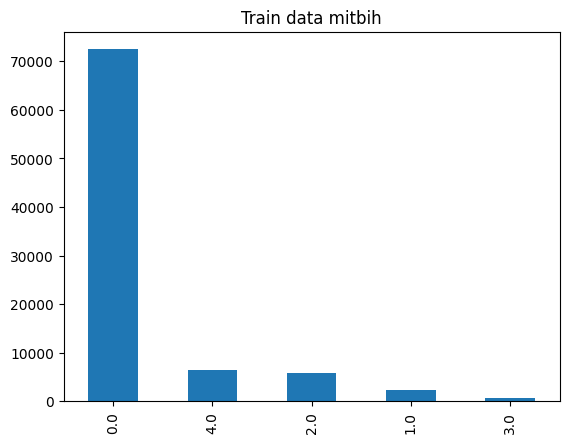

In [51]:
# Train data mitbih

# create a dataframe from the data and labels 
train_df_mitbih = pd.DataFrame(train_x_mitbih)
train_df_mitbih['label'] = train_y_mitbih

# create a plot bar from the dataframe using pandas.plot.bar
train_df_mitbih['label'].value_counts().plot.bar(title = "Train data mitbih")

<Axes: title={'center': 'Train data mitbih'}>

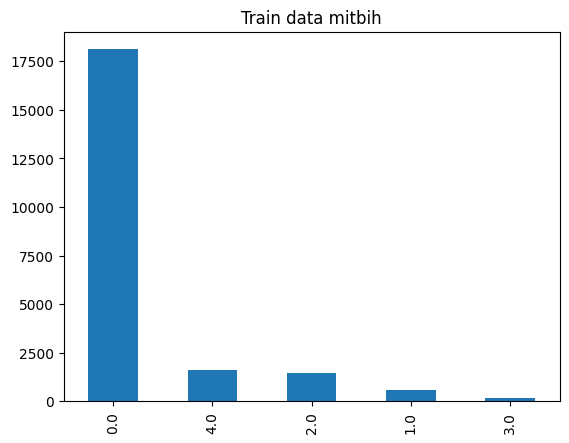

In [52]:
# Test data mitbih

# create a dataframe from the data and labels 
test_df_mitbih = pd.DataFrame(test_x_mitbih)
test_df_mitbih['label'] = test_y_mitbih

# create a plot bar from the dataframe using pandas.plot.bar
test_df_mitbih['label'].value_counts().plot.bar(title = "Train data mitbih")

<Axes: title={'center': 'Train and Test data'}>

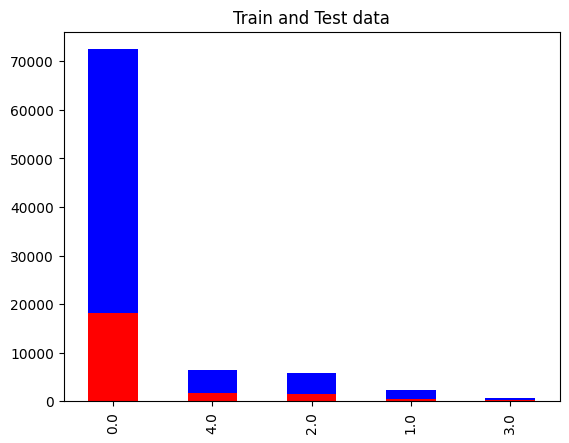

In [53]:
# put test_df and train_df on the same plot bar with different colors 
train_df_mitbih['label'].value_counts().plot.bar(title = "Train and Test data", color = 'blue', alpha = 1)
test_df_mitbih['label'].value_counts().plot.bar(color = 'red', alpha = 1)


In [54]:
# extract unique labels from the data
labels = train_df_mitbih['label'].unique()
counts_train = train_df_mitbih['label'].value_counts()
counts_test= test_df_mitbih['label'].value_counts()


print(labels)
print("----------------------------------")
print("TRAIN: "+  str(counts_train))
print("----------------------------------")
print("TEST: " + str(counts_test))

[0. 1. 2. 3. 4.]
----------------------------------
TRAIN: 0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: label, dtype: int64
----------------------------------
TEST: 0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: label, dtype: int64


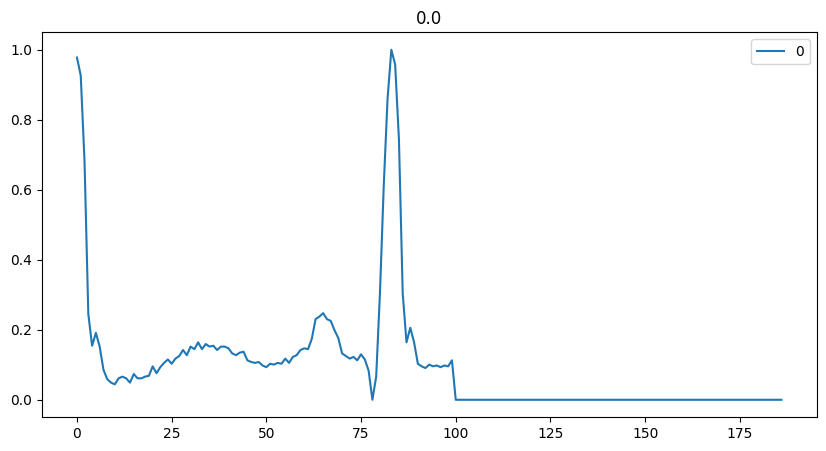

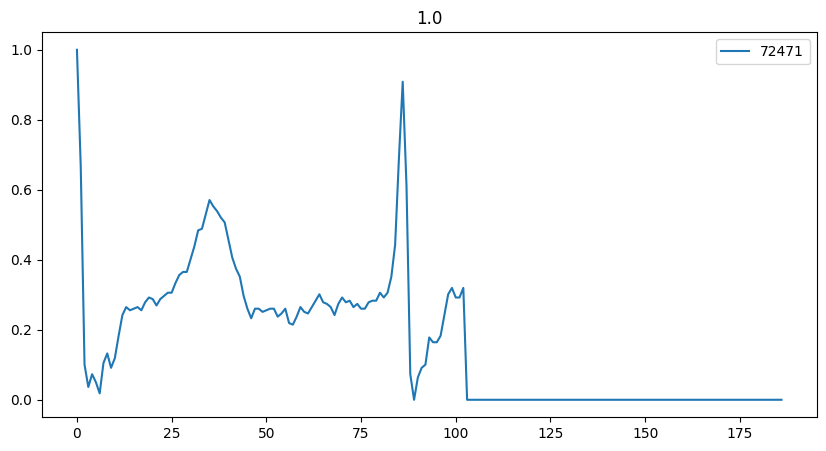

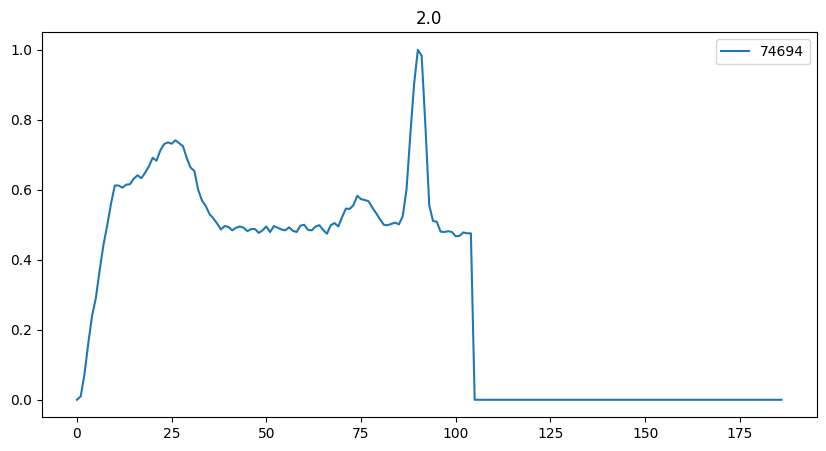

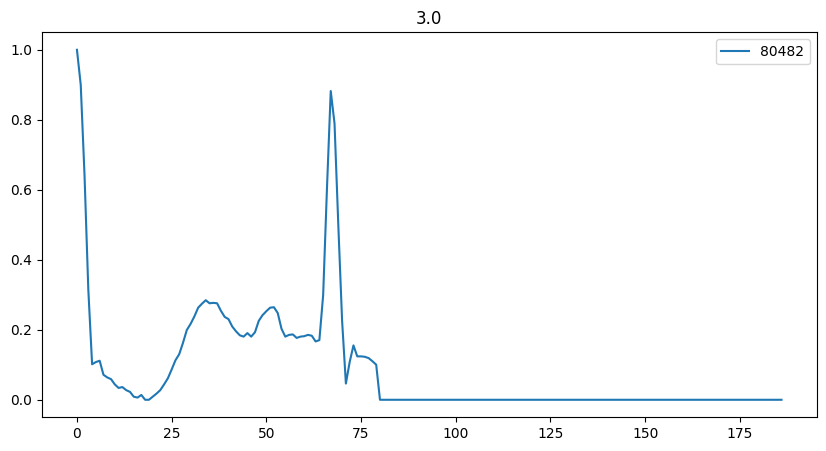

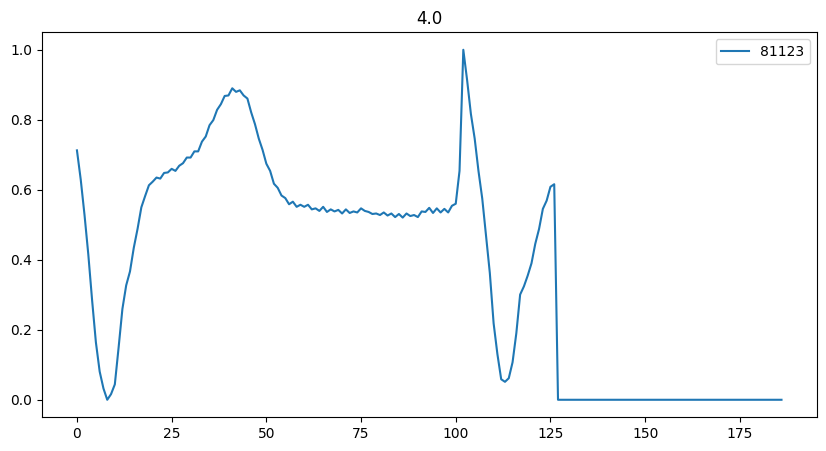

In [58]:
# for each label, plot the data#
for label in labels:
    current = train_df_mitbih[train_df_mitbih['label'] == label].iloc[0]

    # create a dataframe from the data and labels
    current_df = pd.DataFrame(current)
    current_df = current_df.drop('label', axis = 0)
    current_df.plot(title = str(label), figsize = (10, 5))
    